In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [2]:
data=pd.read_csv("f:abc/movies.csv")

In [3]:
data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [4]:
data.shape

(10866, 21)

In [5]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
data.drop(columns=['id','imdb_id','homepage','cast','tagline','overview','budget','budget'],inplace=True)

In [8]:
data.head()

,popularity,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [9]:
data.isnull().sum()

popularity                 0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
data['production_companies ']=data['production_companies'].fillna(0)
data['keywords']=data['keywords'].fillna(0)                              

In [11]:
data

,popularity,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.985763,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.419936,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.112507,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.173104,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.335014,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,Bruce Brown Films
10862,0.065543,0,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,Cherokee Productions|Joel Productions|Douglas ...
10863,0.065141,0,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,Mosfilm
10864,0.064317,0,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,Benedict Pictures Corp.


In [12]:
data['popularity']=data['popularity'].round(2)                                  

In [13]:
data

,popularity,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.99,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.42,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.11,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.17,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.34,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,Bruce Brown Films
10862,0.07,0,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,Cherokee Productions|Joel Productions|Douglas ...
10863,0.07,0,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,Mosfilm
10864,0.06,0,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,Benedict Pictures Corp.


In [14]:
data.insert(3,'profit',data.revenue == data.budget_adj)

In [15]:
data.insert(4,'rol',data.profit / data.budget_adj)

In [16]:
data

,popularity,revenue,original_title,profit,rol,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.99,1513528810,Jurassic World,False,0.0,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.42,378436354,Mad Max: Fury Road,False,0.0,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.11,295238201,Insurgent,False,0.0,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.17,2068178225,Star Wars: The Force Awakens,False,0.0,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.34,1506249360,Furious 7,False,0.0,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,The Endless Summer,True,inf,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,Bruce Brown Films
10862,0.07,0,Grand Prix,True,inf,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,Cherokee Productions|Joel Productions|Douglas ...
10863,0.07,0,Beregis Avtomobilya,True,inf,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,Mosfilm
10864,0.06,0,"What's Up, Tiger Lily?",True,inf,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,Benedict Pictures Corp.


In [17]:
data.columns

Index(['popularity', 'revenue', 'original_title', 'profit', 'rol', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'production_companies '],
      dtype='object')

In [18]:
data1=[('popularity','budget_adj','revenue','profit','rol','vote_count','vote_average','release_year')]

In [19]:
data.isnull().sum()

popularity                  0
revenue                     0
original_title              0
profit                      0
rol                       995
director                   44
keywords                    0
runtime                     0
genres                     23
production_companies     1030
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
production_companies        0
dtype: int64

In [20]:
data.rol.value_counts()

0.0    5170
inf    4701
Name: rol, dtype: int64

In [21]:
non_finite_values = ~np.isfinite(data['rol'])


In [22]:
non_finite_values.sum()

5696

In [23]:
data['rol'] = data['rol'].replace([np.inf, -np.inf], np.nan)


# 

In [24]:
data.popularity.value_counts()

0.14    195
0.28    191
0.21    188
0.25    183
0.20    180
       ... 
5.81      1
5.08      1
3.83      1
3.74      1
2.68      1
Name: popularity, Length: 483, dtype: int64

In [25]:
data.head(2)

,popularity,revenue,original_title,profit,rol,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.99,1513528810,Jurassic World,False,0.0,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.42,378436354,Mad Max: Fury Road,False,0.0,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...


In [26]:
data2=data.groupby('release_year')['rol'].sum()
data2

release_year
1960    0.0
1961    0.0
1962    0.0
1963    0.0
1964    0.0
1965    0.0
1966    0.0
1967    0.0
1968    0.0
1969    0.0
1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
Name: rol, dtype: float64

<AxesSubplot:xlabel='release_year'>

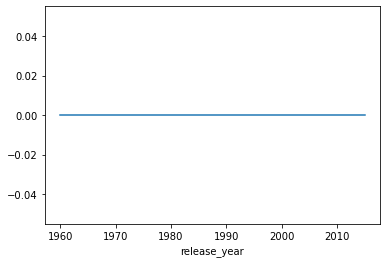

In [27]:
data2=data.groupby('release_year')['rol'].mean()
data2.plot(kind='line')

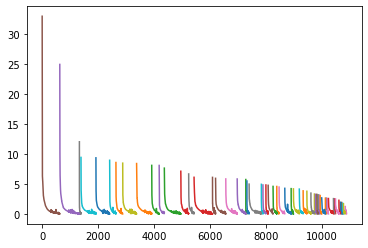

In [28]:
data3 = data.groupby('release_year')['popularity'].plot(kind = 'line')

<AxesSubplot:xlabel='release_year'>

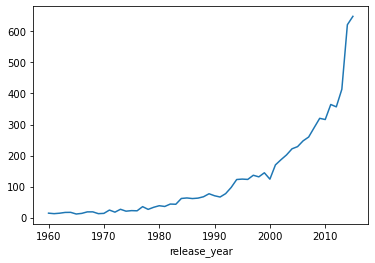

In [29]:
data3 = data.groupby('release_year')['popularity'].sum()
data3.plot(kind='line')

Text(0, 0.5, 'popularity')

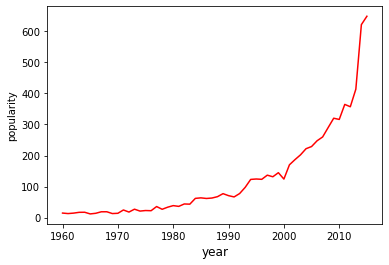

In [30]:
data3 = data.groupby('release_year')['popularity'].sum()
data3.plot(kind =  'line',color='red')
plt.xlabel('year', fontsize =12)
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

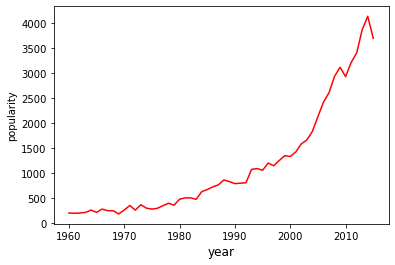

In [31]:
data4 = data.groupby('release_year')['vote_average'].sum()
data4.plot(kind =  'line',color='red')
plt.xlabel('year', fontsize =12)
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

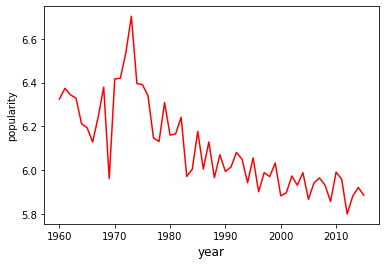

In [32]:
data4 = data.groupby('release_year')['vote_average'].mean()
data4.plot(kind =  'line',color='red')
plt.xlabel('year', fontsize =12)
plt.ylabel('popularity')

Text(0, 0.5, 'rating')

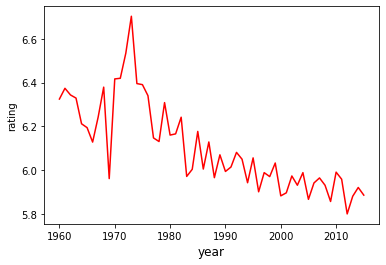

In [33]:
data4 = data.groupby('release_year')['vote_average'].mean()
data4.plot(kind =  'line',color='red')
plt.xlabel('year', fontsize =12)
plt.ylabel('rating')

In [34]:
data

,popularity,revenue,original_title,profit,rol,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.99,1513528810,Jurassic World,False,0.0,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.42,378436354,Mad Max: Fury Road,False,0.0,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.11,295238201,Insurgent,False,0.0,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.17,2068178225,Star Wars: The Force Awakens,False,0.0,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.34,1506249360,Furious 7,False,0.0,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,The Endless Summer,True,NaN,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,Bruce Brown Films
10862,0.07,0,Grand Prix,True,NaN,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,Cherokee Productions|Joel Productions|Douglas ...
10863,0.07,0,Beregis Avtomobilya,True,NaN,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,Mosfilm
10864,0.06,0,"What's Up, Tiger Lily?",True,NaN,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,Benedict Pictures Corp.


In [35]:
data.genres.value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [36]:
data

,popularity,revenue,original_title,profit,rol,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.99,1513528810,Jurassic World,False,0.0,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.42,378436354,Mad Max: Fury Road,False,0.0,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.11,295238201,Insurgent,False,0.0,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.17,2068178225,Star Wars: The Force Awakens,False,0.0,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.34,1506249360,Furious 7,False,0.0,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,The Endless Summer,True,NaN,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,Bruce Brown Films
10862,0.07,0,Grand Prix,True,NaN,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,Cherokee Productions|Joel Productions|Douglas ...
10863,0.07,0,Beregis Avtomobilya,True,NaN,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,Mosfilm
10864,0.06,0,"What's Up, Tiger Lily?",True,NaN,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,Benedict Pictures Corp.


In [37]:
data=data.explode('genres')
data

,popularity,revenue,original_title,profit,rol,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.99,1513528810,Jurassic World,False,0.0,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.42,378436354,Mad Max: Fury Road,False,0.0,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.11,295238201,Insurgent,False,0.0,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.17,2068178225,Star Wars: The Force Awakens,False,0.0,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.34,1506249360,Furious 7,False,0.0,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,The Endless Summer,True,NaN,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,Bruce Brown Films
10862,0.07,0,Grand Prix,True,NaN,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,Cherokee Productions|Joel Productions|Douglas ...
10863,0.07,0,Beregis Avtomobilya,True,NaN,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,Mosfilm
10864,0.06,0,"What's Up, Tiger Lily?",True,NaN,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,Benedict Pictures Corp.


In [38]:
data7=data.groupby('genres')['popularity'].sum()
data7

genres
Action                                      37.27
Action|Adventure                            10.36
Action|Adventure|Animation                   1.82
Action|Adventure|Animation|Comedy|Drama      0.37
Action|Adventure|Animation|Comedy|Family     0.06
                                            ...  
Western|Drama|Crime|Romance                  0.39
Western|History                              0.13
Western|History|War                          0.95
Western|Horror|Thriller                      0.35
Western|Thriller                             0.39
Name: popularity, Length: 2039, dtype: float64

In [39]:
data7=data.groupby('genres')['popularity'].sum().sort_values(ascending = True)
data7

genres
Mystery|Comedy|Drama                                0.00
Crime|Drama|History|Documentary                     0.00
Drama|Horror|Thriller|Science Fiction|Foreign       0.00
Drama|Thriller|Science Fiction|Romance|Foreign      0.00
Horror|Mystery|Thriller|Crime                       0.00
                                                   ...  
Comedy|Drama                                      134.15
Comedy|Romance                                    159.19
Drama|Romance                                     161.43
Drama                                             361.15
Comedy                                            375.21
Name: popularity, Length: 2039, dtype: float64

<AxesSubplot:ylabel='genres'>

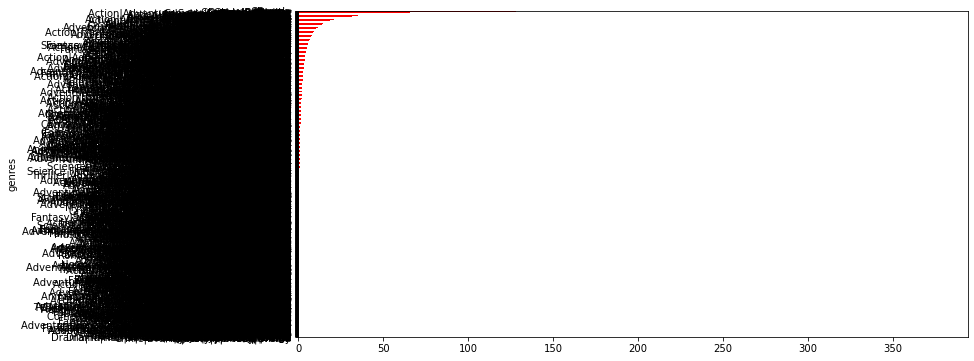

In [40]:
data7.plot.barh(x='genres', y='popularity',color ='red',figsize=(12,6))

In [ ]:
data

In [ ]:
data.head(5)


In [ ]:
data.dtypes

In [44]:
data.head()

,popularity,revenue,original_title,profit,rol,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.99,1513528810,Jurassic World,False,0.0,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.42,378436354,Mad Max: Fury Road,False,0.0,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.11,295238201,Insurgent,False,0.0,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.17,2068178225,Star Wars: The Force Awakens,False,0.0,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.34,1506249360,Furious 7,False,0.0,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,Universal Pictures|Original Film|Media Rights ...


<AxesSubplot:>

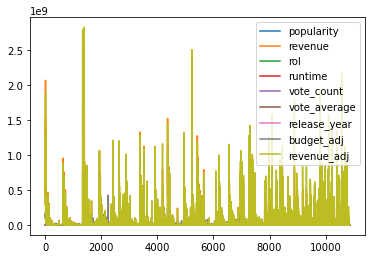

In [45]:
data.plot(kind = 'line')

In [46]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864,
            10865],
           dtype='int64', length=10866)

In [47]:
data.values

array([[32.99, 1513528810, 'Jurassic World', ..., 137999939.3,
        1392445893.0,
        'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu'],
       [28.42, 378436354, 'Mad Max: Fury Road', ..., 137999939.3,
        348161292.5,
        'Village Roadshow Pictures|Kennedy Miller Productions'],
       [13.11, 295238201, 'Insurgent', ..., 101199955.5, 271619025.4,
        'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel'],
       ...,
       [0.07, 0, 'Beregis Avtomobilya', ..., 0.0, 0.0, 'Mosfilm'],
       [0.06, 0, "What's Up, Tiger Lily?", ..., 0.0, 0.0,
        'Benedict Pictures Corp.'],
       [0.04, 0, 'Manos: The Hands of Fate', ..., 127642.2792, 0.0,
        'Norm-Iris']], dtype=object)

In [48]:
data1

[('popularity',
  'budget_adj',
  'revenue',
  'profit',
  'rol',
  'vote_count',
  'vote_average',
  'release_year')]

In [49]:
data

,popularity,revenue,original_title,profit,rol,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,production_companies
0,32.99,1513528810,Jurassic World,False,0.0,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.42,378436354,Mad Max: Fury Road,False,0.0,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.11,295238201,Insurgent,False,0.0,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.17,2068178225,Star Wars: The Force Awakens,False,0.0,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.34,1506249360,Furious 7,False,0.0,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,The Endless Summer,True,NaN,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,Bruce Brown Films
10862,0.07,0,Grand Prix,True,NaN,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,Cherokee Productions|Joel Productions|Douglas ...
10863,0.07,0,Beregis Avtomobilya,True,NaN,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,Mosfilm
10864,0.06,0,"What's Up, Tiger Lily?",True,NaN,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,Benedict Pictures Corp.


In [ ]:
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, y='popularity', colors=['#1f77b4', '#ff7f0e', '#2ca02c'])


<AxesSubplot:ylabel='popularity'>

In [ ]:
data.head

In [ ]:
data.production_companies.value_counts()